In [2]:
import os
import time
from IPython.display import clear_output
from collections import defaultdict, Counter
import math
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import pickle

In [47]:
# must have n lines
# read in contents of single file as dictionary
# load all files as idct of dicts
# calculate tf-idf for each word
# get top n 

#sparse matrix representation

## Read in files to dictionary

In [11]:
src_dir = '/Users/choldawa/Documents/Projects/RedditCorpus/word_count/RC_2009-04'

tick = time.time()

d = {}
problem_subs = []
cnt = 0
for file in os.listdir(src_dir):
    path = src_dir+"/"+file
    with open(path) as f:
        filename = os.path.basename(file).split("_")[2].split(".")[0]
        clear_output(wait=True)
        print(f"working on: {filename}")
        tock = time.time()
        print(f"Time elapsed: {tock - tick} seconds")
        sub_d = {}
#         num_lines = sum(1 for line in open(path)) #must have at least 100 unique words
#         if num_lines > 100:
        for line in f:
            try:
                (val, key) = line.strip().split() #invert the order
                if not any(map(str.isdigit, key)) and int(val)>1: # each word must occur more than once
                    sub_d[key] = int(val)
            except:
                problem_subs.append(filename)
        d[filename] = sub_d
end = time.time()
print(f"Total Time elapsed: {end - tick} seconds")
print(f"We have {len(d)} Subreddits")
print(f"Found problems with {len(problem_subs)} subreddits")

working on: AmerikanPolizei
Time elapsed: 5.443475961685181 seconds
Total Time elapsed: 5.443925142288208 seconds
We have 1330 Subreddits
Found problems with 1 subreddits


In [13]:
print("Here are some example first and last items:")
print("Common words:")
print(list(d['politics'].items())[:5])
print("Uncommon words:")
print(list(d['politics'].items())[-20:])

Here are some example first and last items:
Common words:
[('the', 156882), ('to', 92719), ('a', 71389), ('of', 70185), ('and', 67091)]
Uncommon words:
[('abrogating', 2), ('abril', 2), ('abramoff', 2), ('abovementioned', 2), ('aboveaverage', 2), ('aboutsection', 2), ('abortive', 2), ('abortionists', 2), ('abortifacient', 2), ('aboriginals', 2), ('abominable', 2), ('abjectly', 2), ('abhorrence', 2), ('aberrant', 2), ('abdominal', 2), ('abcnnbcbs', 2), ('abbas', 2), ('aaltonen', 2), ('aaaaand', 2), ('à', 2)]


In [14]:
og = list(d['politics'].items())
random.shuffle(og)
print(og[:])

[('paste', 15), ('staffer', 3), ('word', 985), ('scare', 85), ('critiquing', 5), ('poker', 15), ('factfinding', 2), ('ballooning', 3), ('prank', 14), ('taunts', 2), ('chopin', 2), ('wanting', 160), ('twohour', 2), ('commentator', 15), ('highschoolers', 2), ('tolls', 20), ('wildeyed', 2), ('treasure', 5), ('oriley', 2), ('surpasses', 2), ('friedns', 2), ('shambles', 9), ('vampires', 8), ('galactica', 3), ('meir', 2), ('bronston', 2), ('obamabots', 13), ('bling', 7), ('poles', 12), ('divisive', 26), ('nada', 7), ('weaver', 2), ('wedged', 2), ('pentecostal', 5), ('diplomacy', 32), ('electrification', 2), ('whip', 23), ('comprehensively', 2), ('unsigned', 4), ('eons', 5), ('overstating', 2), ('haters', 23), ('molesters', 6), ('passionately', 10), ('ch', 4), ('lefts', 12), ('enrons', 4), ('regulated', 92), ('salvia', 2), ('holiday', 25), ('twat', 18), ('bench', 26), ('activist', 54), ('subsidy', 19), ('follows', 62), ('communitys', 2), ('larry', 40), ('congruence', 2), ('frb', 2), ('fats', 

## TF-IDF Calculations

In [15]:
sub_dict = copy.deepcopy(d) #make a deepcopy (need to copy nested obj)

In [16]:
N = len(sub_dict)

df = defaultdict(int)
for s in sub_dict:
    for w in sub_dict[s]: #count of subs where w appears
        df[w] += 1
print(f" We have {N} sub_reddits and {df['game']} contain 'game'")

 We have 1330 sub_reddits and 142 contain 'game'


In [ ]:
for s in sub_dict:
    for key, value in sub_dict[s].items():
        tf = (value/
                  ((sum(sub_dict[s].values())-value)+1))
        idf = (np.log(N / df[key]))
        tfidf = tf*idf
        sub_dict[s][key] = tfidf
    

In [ ]:
for s in sub_dict:
    print(s, 
          list(dict(sorted(sub_dict[s].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:3]).items()))

In [54]:

with open('12_2012_tfidf.pickle', 'wb') as handle:
    pickle.dump(sub_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
with open('12_2012_tfidf.pickle', 'rb') as handle:
    sub_dict = pickle.load(handle)

### Plot histogram of word counts

We have 629286 unique words and 22409 unique subreddits


[]

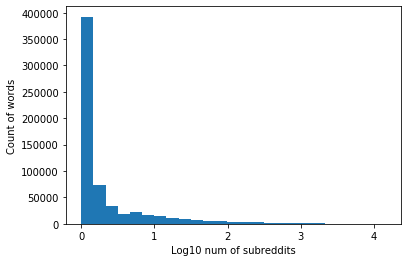

In [56]:
print(f"We have {len(df)} unique words and {len(d)} unique subreddits")
logD = {k:np.log10(v) for k, v in df.items()}
plt.hist(logD.values(), bins = 25)
plt.xlabel("Log10 num of subreddits")
plt.ylabel("Count of words")
plt.plot()

### Plotting with Counter (not sure if it works with non-integers...)

In [89]:
# sub_reddit = 'america' #america #politics # theoffice
# topN = 10
# c = Counter(sub_dict[sub_reddit]) #create counter

# most_common = c.most_common(topN) # get topN tf-idf
# most_common

# plt.bar(range(len(most_common)), [val[1] for val in most_common], align='center')
# plt.xticks(range(len(most_common)), [val[0] for val in most_common])
# plt.xticks(rotation=70)
# plt.title(sub_reddit)
# plt.show()

### Plotting sorted dict

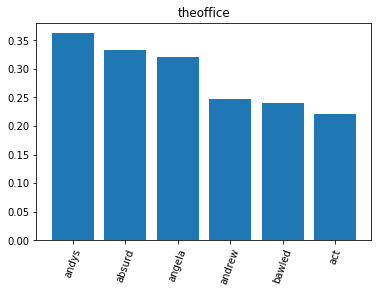

In [28]:
sub_reddit = 'theoffice' # theoffice
topN = 6
x = list(dict(sorted(sub_dict[sub_reddit].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:topN]).keys())
y = list(dict(sorted(sub_dict[sub_reddit].items(), 
                           key=lambda item: item[1], reverse = True)
                    [:topN]).values())


plt.bar(x,y, align='center')
plt.xticks(rotation=70)
plt.title(sub_reddit)
plt.show()

In [1]:
d = [{"sub_1":{'foo': 1, "bar":2}}, 
     {"sub_2": {'foo':3, "baz": 10, 'bar':2}}]

#take a list of dictionaries with dictionaries
#run sklearn tf-idf to get matrix
# access top N tf-df for any row 
# get the names of those words (with highest tf-idf)
# tie that row back to the name of the subreddit

d[0]

{'sub_1': {'foo': 1, 'bar': 2}}